# Life Expectancy By Country

Over the course of the past few centuries, technological and medical advancements have helped increase the life expectancy of humans. However, as of now, the average life expectancy of humans varies depending on what country you live in.

In this project, we will investigate a dataset containing information about the average life expectancy in 158 different countries. We will specifically look at how a country’s economic success might impact the life expectancy in that area.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import iqr

Access the Data

In [4]:
data = pd.read_csv('country_data.csv')
pd.set_option('display.max_rows', None)
data.head()

,Country,Life Expectancy,GDP
0,Afghanistan,58.19375,340.015425
1,Albania,75.15625,2119.726679
2,Algeria,73.61875,2847.853392
3,Angola,49.01875,1975.143045
4,Antigua and Barbuda,75.05625,9759.305728


In [5]:
data.columns

Index(['Country', 'Life Expectancy', 'GDP'], dtype='object')

In [20]:
len(data)

158

In [7]:
life_expect = data['Life Expectancy']
life_expect.head()

0    58.19375
1    75.15625
2    73.61875
3    49.01875
4    75.05625
Name: Life Expectancy, dtype: float64

In [8]:
life_expect_quartiles = np.quantile(life_expect, [0.25, 0.5, 0.75])
life_expect_quartiles

array([62.325    , 72.525    , 75.4421875])

Histogram

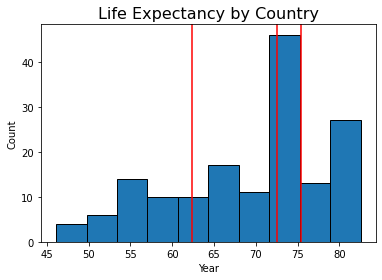

In [12]:
plt.hist(life_expect, edgecolor='black')
for quartile in life_expect_quartiles:
    plt.axvline(x=quartile, color='r', linestyle='solid')
plt.title('Life Expectancy by Country', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Count')

plt.show()

Spliting the Data by GDP

In [14]:
gdp = data['GDP']
gdp.head()

0     340.015425
1    2119.726679
2    2847.853392
3    1975.143045
4    9759.305728
Name: GDP, dtype: float64

In [15]:
median_gdp = np.median(gdp)
median_gdp

2938.0781152500003

In [16]:
min_gdp = np.min(gdp)
min_gdp

137.81532131875

In [17]:
max_gdp = np.max(gdp)
max_gdp

57362.874601250005

In [25]:
low_gdp = data[gdp <= median_gdp]
low_gdp.head()

,Country,Life Expectancy,GDP
0,Afghanistan,58.19375,340.015425
1,Albania,75.15625,2119.726679
2,Algeria,73.61875,2847.853392
3,Angola,49.01875,1975.143045
6,Armenia,73.40000,1999.986318


In [26]:
len(low_gdp)

79

In [24]:
high_gdp = data[gdp > median_gdp]
high_gdp.head()

,Country,Life Expectancy,GDP
4,Antigua and Barbuda,75.05625,9759.305728
5,Argentina,75.15625,6998.575103
7,Australia,81.81250,34637.565047
8,Austria,81.48125,33827.476309
9,Azerbaijan,70.73125,3302.947807


In [27]:
len(high_gdp)

79

In [28]:
low_gdp_quartile = np.quantile(low_gdp['Life Expectancy'], [0.25, 0.5, 0.75])
low_gdp_quartile

array([56.3375 , 64.34375, 71.7375 ])

In [31]:
high_gdp_quartile = np.quantile(high_gdp['Life Expectancy'], [0.25, 0.5, 0.75])
high_gdp_quartile

array([72.965625, 75.15625 , 80.521875])

Histogram and Conclusion

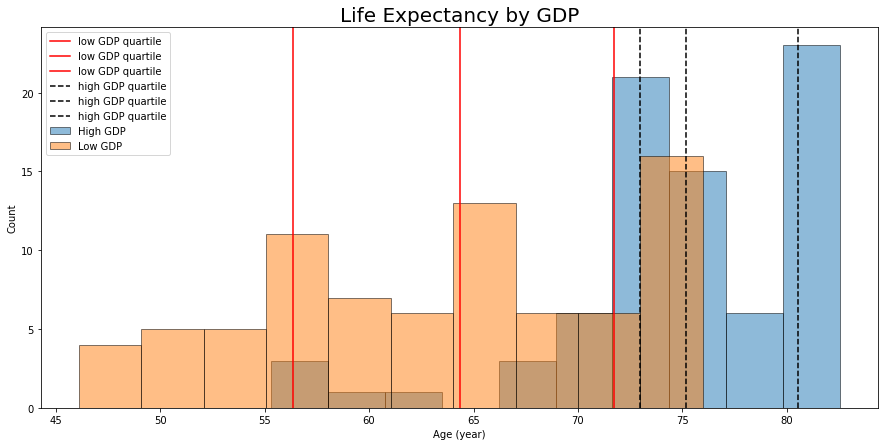

In [47]:
plt.figure(figsize=(15, 7))

plt.hist(high_gdp['Life Expectancy'], alpha=0.5, label='High GDP', edgecolor='black')
plt.hist(low_gdp['Life Expectancy'], alpha=0.5, label='Low GDP', edgecolor='black')
plt.title('Life Expectancy by GDP', fontsize=20)
plt.xlabel('Age (year)')
plt.ylabel('Count')

for quartile in low_gdp_quartile:
    plt.axvline(x=quartile, color='r', linestyle='solid', label = 'low GDP quartile')
    
for quartile in high_gdp_quartile:
    plt.axvline(x=quartile, color='black', linestyle='--', label = 'high GDP quartile')
    
plt.legend()
plt.show()

We can now truly see the impact GDP has on life expectancy.

Once again, consider a country that has a life expectancy of 70 years. 
If that country is in the top half of GDP countries, is it in the first, second, third, or fourth quarter of the data with respect to life expectancy? 
What if the country is in the bottom half of GDP countries?

70 years old is below the first quartile of high GDP dataset, so it falls in the first quarter of dataset.
70 years old is between second and third quartile of lower GDP dataset, so it falls in the third quarter of dataset.